```
This notebook contains experiments of ensembles of instable double 
jets.

Copyright (C) 2019  SINTEF Digital

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.
```

# Double Jet Ensembles

In [1]:
#Lets have matplotlib "inline"
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

#Import packages we need
import numpy as np
from matplotlib import animation, rc
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

import os
import datetime
import sys

from importlib import reload

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))


plt.rcParams["animation.html"] = "jshtml"

#Import our simulator
from SWESimulators import  CDKLM16, Common, IPythonMagic, DoubleJetCase, DoubleJetEnsemble
#Import initial condition and bathymetry generating functions:

from SWESimulators import GPUDrifterCollection, shallowWaterGPUhelpers

In [2]:
#%setup_logging --out galewsky.log
%cuda_context_handler gpu_ctx

In [3]:
#Create output directory for images
#imgdir='videos_' + datetime.datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
#os.makedirs(imgdir)
#print("Saving videos to " + imgdir)

In [4]:
def myImshow(data):
    fig = plt.figure(figsize=(6,3))
    plt.imshow(data, origin='lower')
    plt.colorbar()

# New simulator and ensemble classes

First, we create a new simulator class that can be used to initiate ensemble members, and that are tailored for 


Creating a class for setting up the case, which can be used by the ensemble class

In [7]:
reload(DoubleJetCase)
num_steps = 500*80*4

(dx, dy):  (2220.0, 2220.0)
dy_phi 0.00034906585039886566
(dy, dx) (2220.0, 2220.0)
sim_u_init.shape:  (304,)
sim_h_init_mean:  227.7701225185425
sim_h_init_mean:  227.7701225185425
max_dt:  11.030632354645192
dt:  8.824505883716155
max dt gravity:   11.686368527726028
max dt momentum:  181.86658636159555
max/min sim_h_init: 230.0 225.5065932103216
sim_h_init.shape:  (304,)
eta0.shape (304, 504)
(ny, nx):  (300, 500)


## Steady state Case

Not in perfect steady state, but it seems to avoid instabilities in the jets.

In [14]:
unpertDoubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, model_error=False)
unpert_args, unpert_init = unpertDoubleJetCase.getInitConditions()
unpert_sim = CDKLM16.CDKLM16(**unpert_args, **unpert_init)

for i in range(10):
    t = unpert_sim.step((num_steps/10)*unpert_sim.dt)
    print(i, "t: " + str(t))

(dx, dy):  (2220.0, 2220.0)
dy_phi 0.00034906585039886566
(dy, dx) (2220.0, 2220.0)
sim_u_init.shape:  (304,)
sim_h_init_mean:  227.7701225185425
sim_h_init_mean:  227.7701225185425
max_dt:  11.030632354645192
dt:  8.824505883716155
max dt gravity:   11.686368527726028
max dt momentum:  181.86658636159555
max/min sim_h_init: 230.0 225.5065932103216
sim_h_init.shape:  (304,)
eta0.shape (304, 504)
(ny, nx):  (300, 500)
0 t: 141192.0928955078
1 t: 282384.1857910156
2 t: 423576.27868652344
3 t: 564768.3715820312
4 t: 705960.4644775391
5 t: 847152.5573730469
6 t: 988344.6502685547
7 t: 1129536.7431640625
8 t: 1270728.8360595703
9 t: 1411920.9289550781


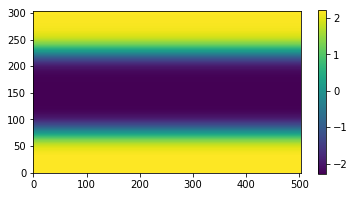

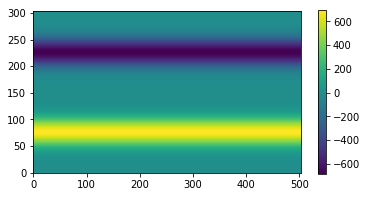

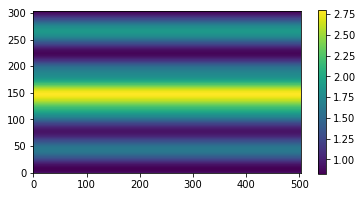

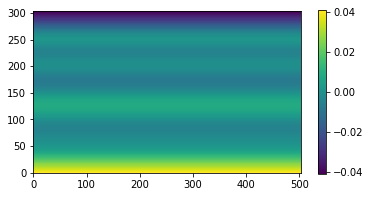

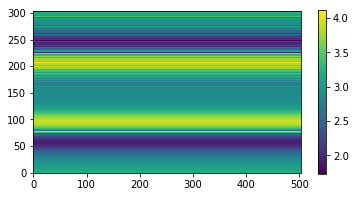

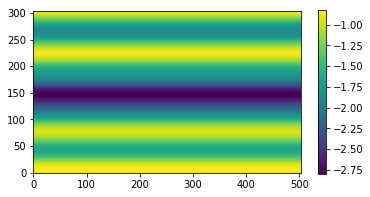

In [15]:
eta1, hu1, hv1 = unpert_sim.download()

myImshow(eta1)
myImshow(hu1)
myImshow(hv1)

myImshow(unpert_init['eta0'] - eta1)
myImshow(unpert_init['hu0'] - hu1)
myImshow(unpert_init['hv0'] - hv1)


## Standard bumps
The perturbation bumps are positioned at a given $x$. 

In [17]:
stdpertDoubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, 
                                                   DoubleJetCase.DoubleJetPerturbationType.StandardPerturbedState, 
                                                   model_error=False)
stdpert_args, stdpert_init = stdpertDoubleJetCase.getInitConditions()
stdpert_sim = CDKLM16.CDKLM16(**stdpert_args, **stdpert_init)

for i in range(10):
    t = stdpert_sim.step((num_steps/10)*stdpert_sim.dt)
    print(i, "t: " + str(t))



(dx, dy):  (2220.0, 2220.0)
dy_phi 0.00034906585039886566
(dy, dx) (2220.0, 2220.0)
sim_u_init.shape:  (304,)
sim_h_init_mean:  227.7701225185425
sim_h_init_mean:  227.7701225185425
max_dt:  11.030632354645192
dt:  8.824505883716155
max dt gravity:   11.686368527726028
max dt momentum:  181.86658636159555
max/min sim_h_init: 230.0 225.5065932103216
sim_h_init.shape:  (304,)
eta0.shape (304, 504)
(ny, nx):  (300, 500)
phi_delta:   0.09599310885968812
pert_alpha:  0.09599310885968812
pert_beta:   0.019198621771937624
0 t: 141192.0928955078
1 t: 282384.1857910156
2 t: 423576.27868652344
3 t: 564768.3715820312
4 t: 705960.4644775391
5 t: 847152.5573730469
6 t: 988344.6502685547
7 t: 1129536.7431640625
8 t: 1270728.8360595703
9 t: 1411920.9289550781


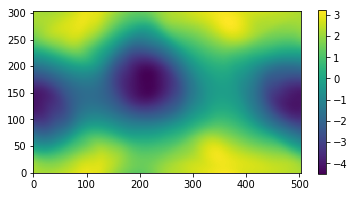

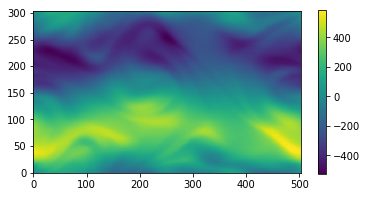

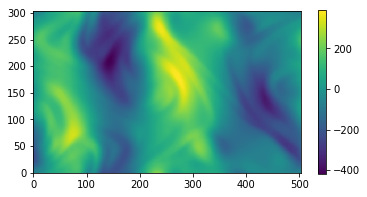

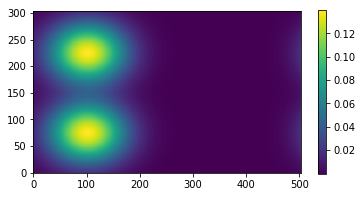

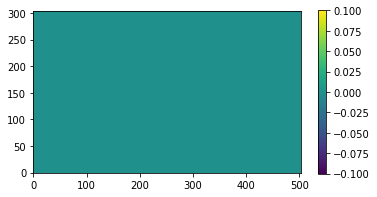

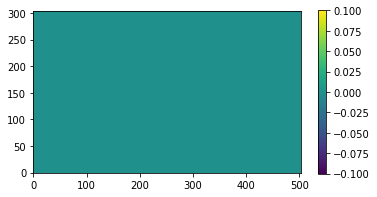

In [19]:
eta2, hu2, hv2 = stdpert_sim.download()

myImshow(eta2)
myImshow(hu2)
myImshow(hv2)

myImshow(stdpert_init['eta0'] - unpert_init['eta0'])
myImshow(stdpert_init['hu0'] - unpert_init['hu0'])
myImshow(stdpert_init['hv0'] - unpert_init['hv0'])

## Uniform distributed perturbation bumps
The bumps are placed at random positions along the $x$-axis.

In [22]:
urndpertDoubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, 
                                                   DoubleJetCase.DoubleJetPerturbationType.UniformPerturbedState, 
                                                   model_error=False)
urndpert_args, urndpert_init = urndpertDoubleJetCase.getInitConditions()
urndpert_sim = CDKLM16.CDKLM16(**urndpert_args, **urndpert_init)

for i in range(10):
    t = urndpert_sim.step((num_steps/10)*urndpert_sim.dt)
    print(i, "t: " + str(t))



(dx, dy):  (2220.0, 2220.0)
dy_phi 0.00034906585039886566
(dy, dx) (2220.0, 2220.0)
sim_u_init.shape:  (304,)
sim_h_init_mean:  227.7701225185425
sim_h_init_mean:  227.7701225185425
max_dt:  11.030632354645192
dt:  8.824505883716155
max dt gravity:   11.686368527726028
max dt momentum:  181.86658636159555
max/min sim_h_init: 230.0 225.5065932103216
sim_h_init.shape:  (304,)
eta0.shape (304, 504)
(ny, nx):  (300, 500)
mid_cell_x_pos, mid_cell_x_neg 155 144
phi_delta:   0.09599310885968812
pert_alpha:  0.09599310885968812
pert_beta:   0.019198621771937624
0 t: 141192.0928955078
1 t: 282384.1857910156
2 t: 423576.27868652344
3 t: 564768.3715820312
4 t: 705960.4644775391
5 t: 847152.5573730469
6 t: 988344.6502685547
7 t: 1129536.7431640625
8 t: 1270728.8360595703
9 t: 1411920.9289550781


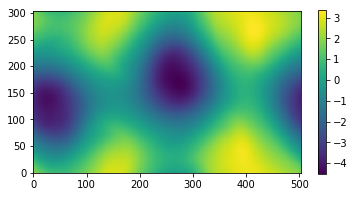

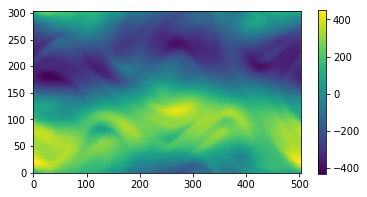

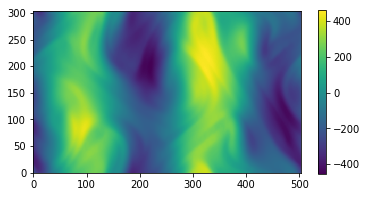

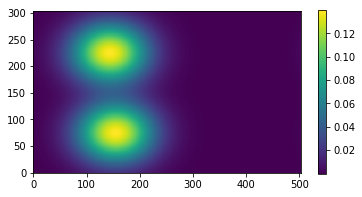

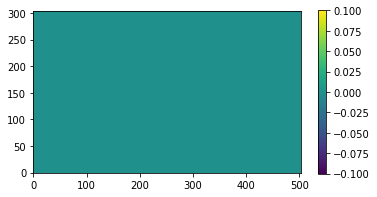

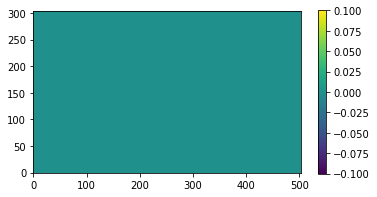

In [23]:
eta2, hu2, hv2 = urndpert_sim.download()

myImshow(eta2)
myImshow(hu2)
myImshow(hv2)

myImshow(urndpert_init['eta0'] - unpert_init['eta0'])
myImshow(urndpert_init['hu0'] - unpert_init['hu0'])
myImshow(urndpert_init['hv0'] - unpert_init['hv0'])

## Normal distributed perturbation bumps
The perturbation bumps are located at random positions along the $x$-axis, with mean 1/4th into the domain, and standard deviation of ten grid cells.

In [24]:
nrndpertDoubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, 
                                                    DoubleJetCase.DoubleJetPerturbationType.NormalPerturbedState, 
                                                    model_error=False)
nrndpert_args, nrndpert_init = nrndpertDoubleJetCase.getInitConditions()
nrndpert_sim = CDKLM16.CDKLM16(**nrndpert_args, **nrndpert_init)

for i in range(10):
    t = nrndpert_sim.step((num_steps/10)*nrndpert_sim.dt)
    print(i, "t: " + str(t))


(dx, dy):  (2220.0, 2220.0)
dy_phi 0.00034906585039886566
(dy, dx) (2220.0, 2220.0)
sim_u_init.shape:  (304,)
sim_h_init_mean:  227.7701225185425
sim_h_init_mean:  227.7701225185425
max_dt:  11.030632354645192
dt:  8.824505883716155
max dt gravity:   11.686368527726028
max dt momentum:  181.86658636159555
max/min sim_h_init: 230.0 225.5065932103216
sim_h_init.shape:  (304,)
eta0.shape (304, 504)
(ny, nx):  (300, 500)
mid_cell_x_pos, mid_cell_x_neg 83.91854471132405 152.68003452206307
phi_delta:   0.09599310885968812
pert_alpha:  0.09599310885968812
pert_beta:   0.019198621771937624
0 t: 141192.0928955078
1 t: 282384.1857910156
2 t: 423576.27868652344
3 t: 564768.3715820312
4 t: 705960.4644775391
5 t: 847152.5573730469
6 t: 988344.6502685547
7 t: 1129536.7431640625
8 t: 1270728.8360595703
9 t: 1411920.9289550781


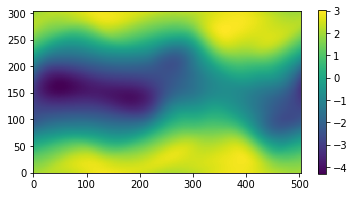

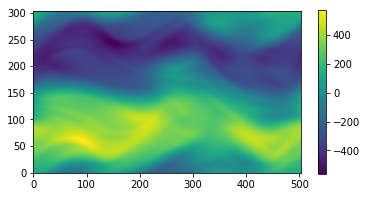

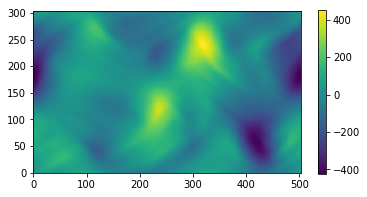

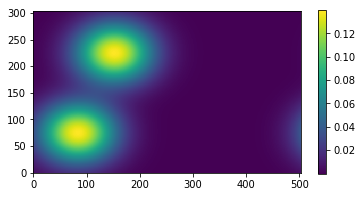

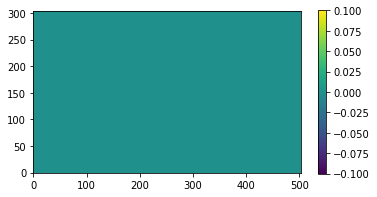

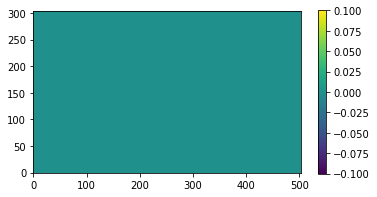

In [25]:
eta2, hu2, hv2 = nrndpert_sim.download()

myImshow(eta2)
myImshow(hu2)
myImshow(hv2)

myImshow(nrndpert_init['eta0'] - unpert_init['eta0'])
myImshow(nrndpert_init['hu0'] - unpert_init['hu0'])
myImshow(nrndpert_init['hv0'] - unpert_init['hv0'])

## Steady state with model error
A case where the initial conditions are given by the steady state, but where additive stochastic model error disturb the solution.

In [36]:
moderrDoubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, 
                                                  model_error=True)
moderr_args, moderr_init = moderrDoubleJetCase.getInitConditions()
moderr_sim = CDKLM16.CDKLM16(**moderr_args, **moderr_init)

for i in range(10):
    t = moderr_sim.step((num_steps/10)*moderr_sim.dt)
    print(i, "t: " + str(t))



(dx, dy):  (2220.0, 2220.0)
dy_phi 0.00034906585039886566
(dy, dx) (2220.0, 2220.0)
sim_u_init.shape:  (304,)
sim_h_init_mean:  227.7701225185425
sim_h_init_mean:  227.7701225185425
max_dt:  11.030632354645192
dt:  8.824505883716155
max dt gravity:   11.686368527726028
max dt momentum:  181.86658636159555
max/min sim_h_init: 230.0 225.5065932103216
sim_h_init.shape:  (304,)
eta0.shape (304, 504)
(ny, nx):  (300, 500)
0 t: 141192.0928955078
1 t: 282384.1857910156
2 t: 423576.27868652344
3 t: 564768.3715820312
4 t: 705960.4644775391
5 t: 847152.5573730469
6 t: 988344.6502685547
7 t: 1129536.7431640625
8 t: 1270728.8360595703
9 t: 1411920.9289550781


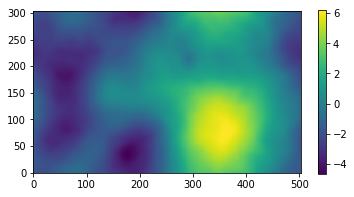

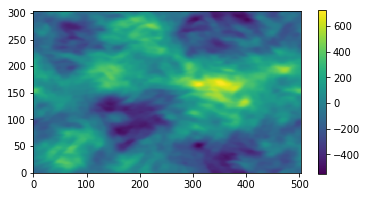

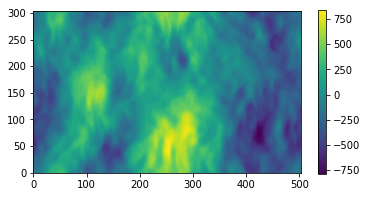

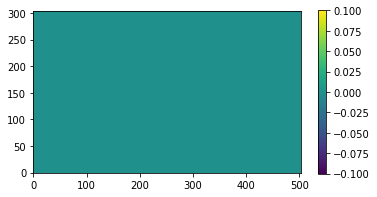

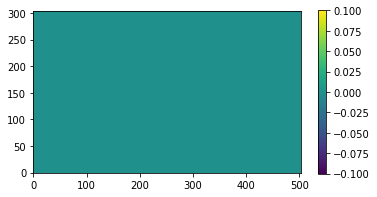

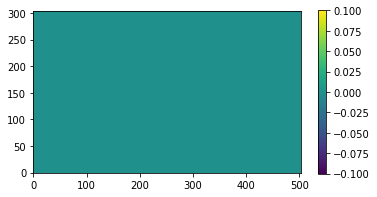

In [37]:
eta2, hu2, hv2 = moderr_sim.download()

myImshow(eta2)
myImshow(hu2)
myImshow(hv2)

myImshow(moderr_init['eta0'] - unpert_init['eta0'])
myImshow(moderr_init['hu0'] - unpert_init['hu0'])
myImshow(moderr_init['hv0'] - unpert_init['hv0'])

# Ensembles of different initial states

In [10]:
reload(DoubleJetCase)
reload(DoubleJetEnsemble)
numParticles = 20

## Steady state ensemble

All initial conditions are the same

In [12]:
unpertDoubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, model_error=False)


(dx, dy):  (2220.0, 2220.0)
dy_phi 0.00034906585039886566
(dy, dx) (2220.0, 2220.0)
sim_u_init.shape:  (304,)
sim_h_init_mean:  227.7701225185425
sim_h_init_mean:  227.7701225185425
max_dt:  11.030632354645192
dt:  8.824505883716155
max dt gravity:   11.686368527726028
max dt momentum:  181.86658636159555
max/min sim_h_init: 230.0 225.5065932103216
sim_h_init.shape:  (304,)
eta0.shape (304, 504)
(ny, nx):  (300, 500)


In [13]:
unpert_ensemble = DoubleJetEnsemble.DoubleJetEnsemble(gpu_ctx, numParticles, unpertDoubleJetCase, num_drifters=4)

Calling parent constructor from DoubleJetEnsemble
Hei from BaseOceanStateEnsemble


/home/havahol/miniconda3/envs/gpuocean/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


CPU times: user 864 ms, sys: 0 ns, total: 864 ms
Wall time: 865 ms


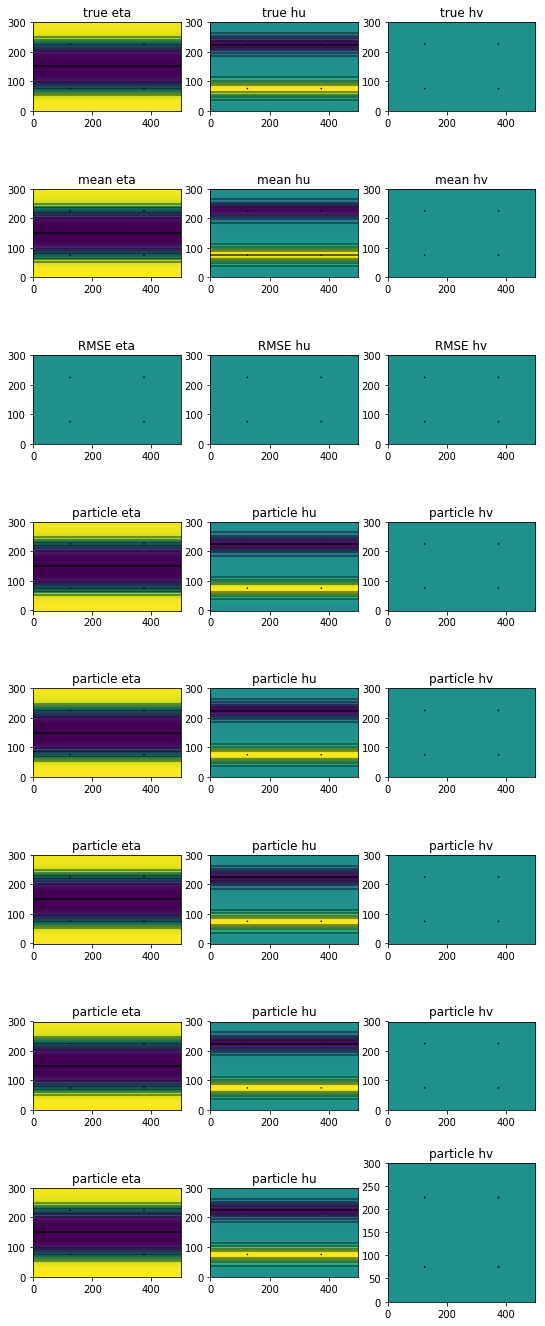

In [14]:
%%time
unpert_ensemble.plotEnsemble(num_particles=5, plotVelocityField=False)

## Normal distributed perturbation bumps

Initial conditions are different across the ensemble (in the first plot), and the ensemble spreads with time (second plot)

In [7]:
normstdPertDoubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx,
                                                       DoubleJetCase.DoubleJetPerturbationType.NormalPerturbedState,
                                                       model_error=False)

In [11]:
normstdpert_ensemble = DoubleJetEnsemble.DoubleJetEnsemble(gpu_ctx, numParticles, normstdPertDoubleJetCase, num_drifters=4)

Calling parent constructor from DoubleJetEnsemble
Hei from BaseOceanStateEnsemble


/home/havahol/miniconda3/envs/gpuocean/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


CPU times: user 1.27 s, sys: 28 ms, total: 1.3 s
Wall time: 1.3 s


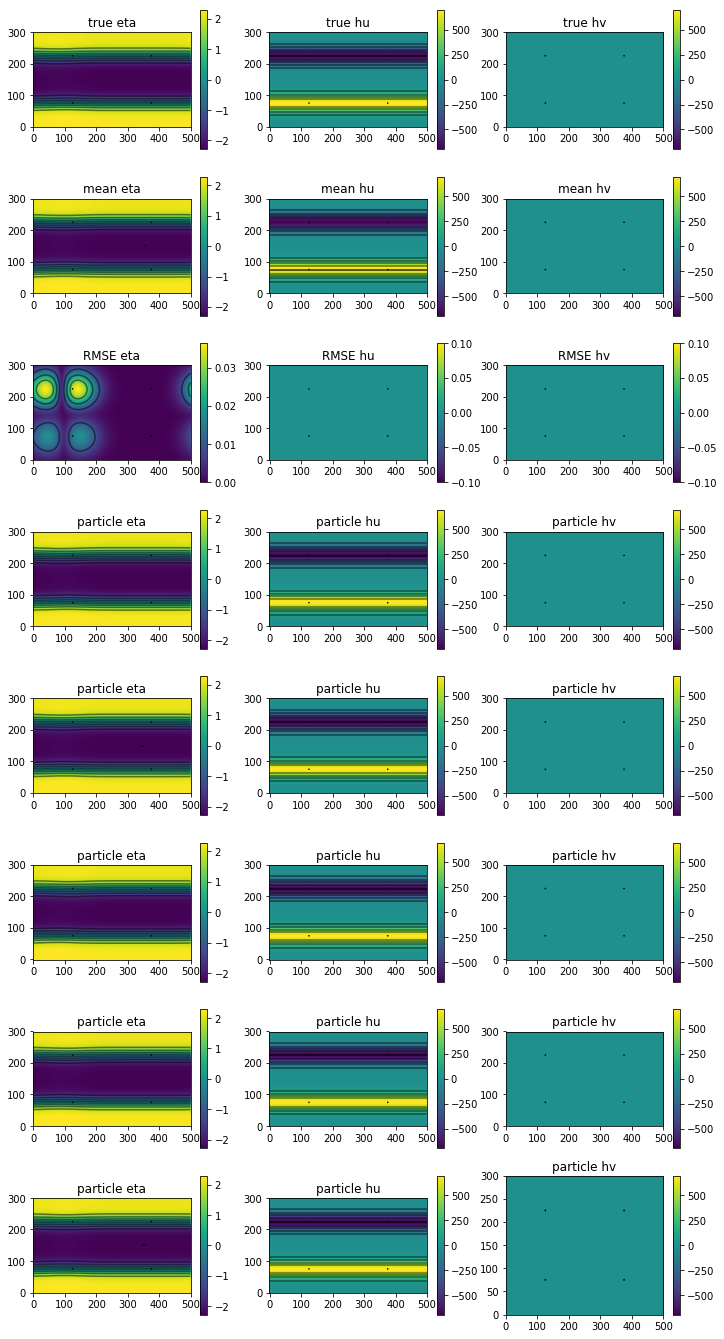

In [12]:
%%time
normstdpert_ensemble.plotEnsemble(num_particles=5, plotVelocityField=False)

In [13]:
%%time
num_steps = 500*80*4/10
dt = normstdpert_ensemble.particles[0].dt


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.54 µs


In [ ]:
normstdpert_ensemble.step(num_steps*dt)

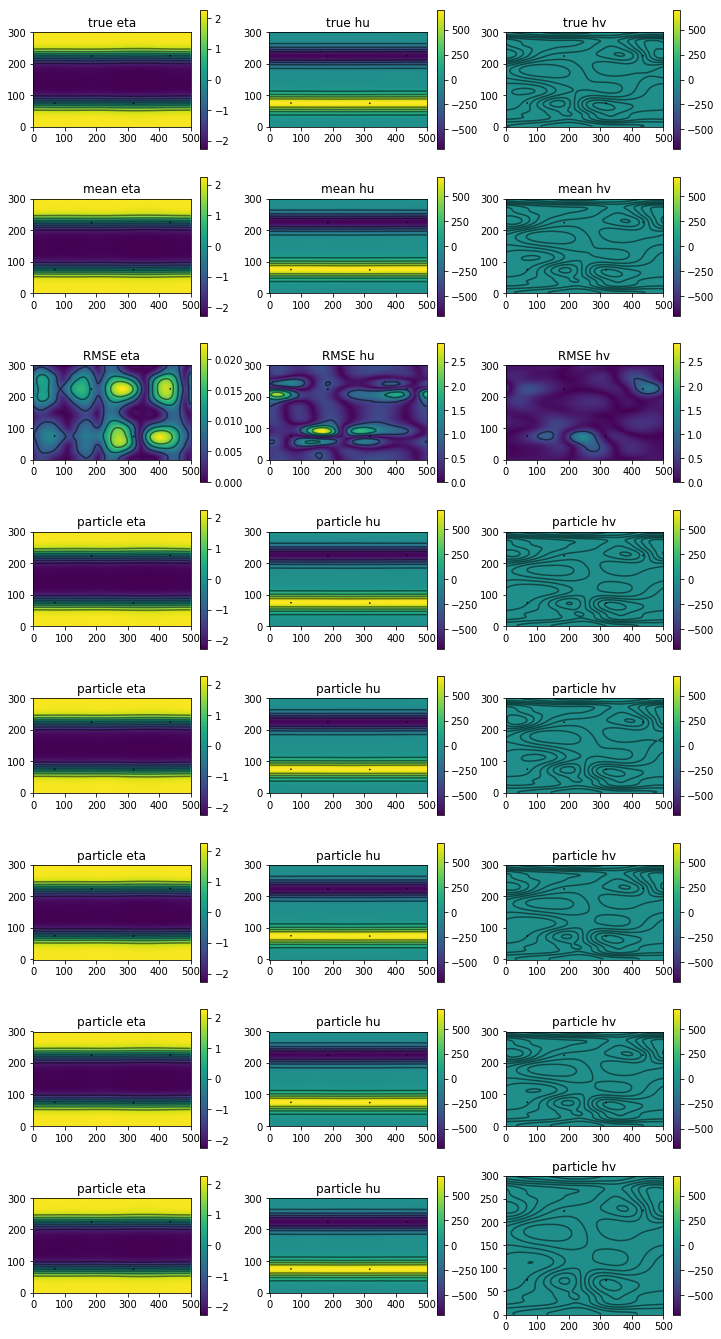

In [76]:
normstdpert_ensemble.plotEnsemble(num_particles=5, plotVelocityField=False)

In [77]:
normstdpert_ensemble.cleanUp()

## Uniform distributed perturbation bumps

Initial conditions are different across the ensemble (in the first plot), and the ensemble spreads with time (second plot)

In [14]:
uniformPertDoubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx,
                                                       DoubleJetCase.DoubleJetPerturbationType.UniformPerturbedState,
                                                       model_error=False)

In [15]:
uniformpert_ensemble = DoubleJetEnsemble.DoubleJetEnsemble(gpu_ctx, numParticles, 
                                                           uniformPertDoubleJetCase, num_drifters=4)

Calling parent constructor from DoubleJetEnsemble
Hei from BaseOceanStateEnsemble


/home/havahol/miniconda3/envs/gpuocean/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


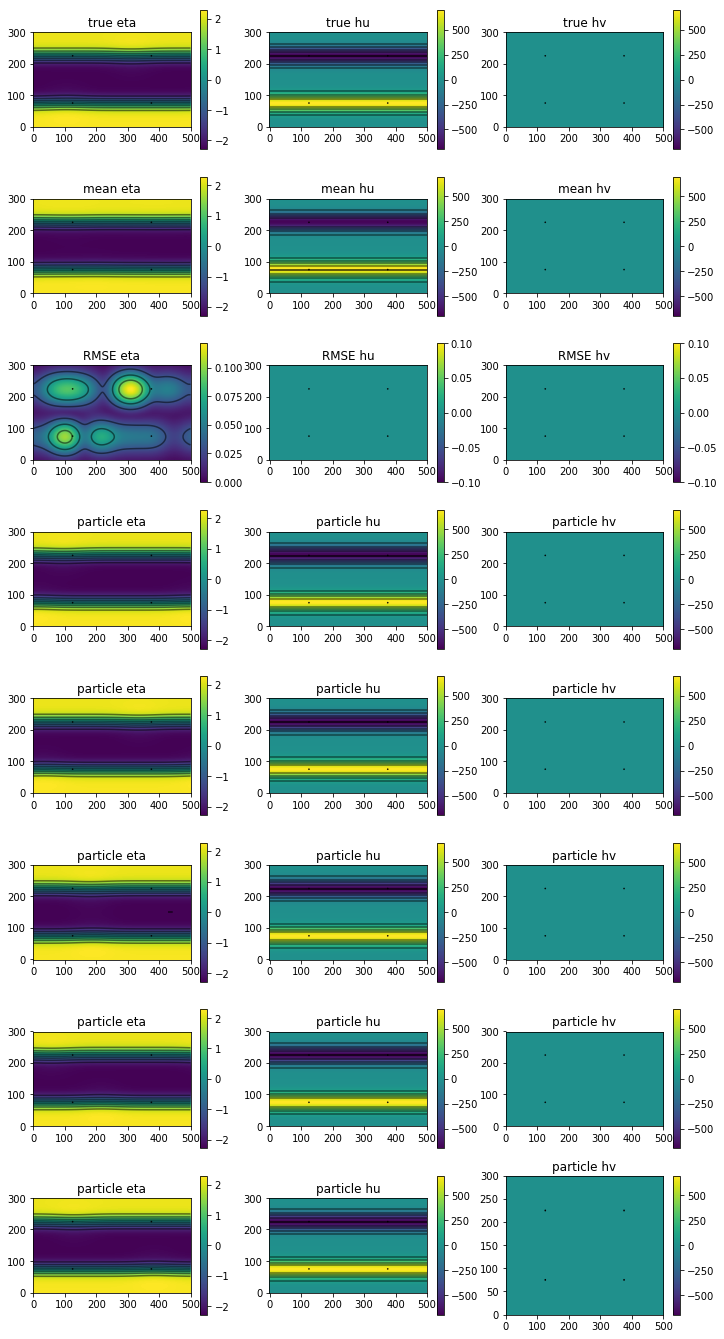

In [16]:
uniformpert_ensemble.plotEnsemble(num_particles=5, plotVelocityField=False)

In [17]:
%%time
uniformpert_ensemble.step(num_steps*dt)

CPU times: user 1min 59s, sys: 9.31 s, total: 2min 8s
Wall time: 2min 8s


141192.0928955078

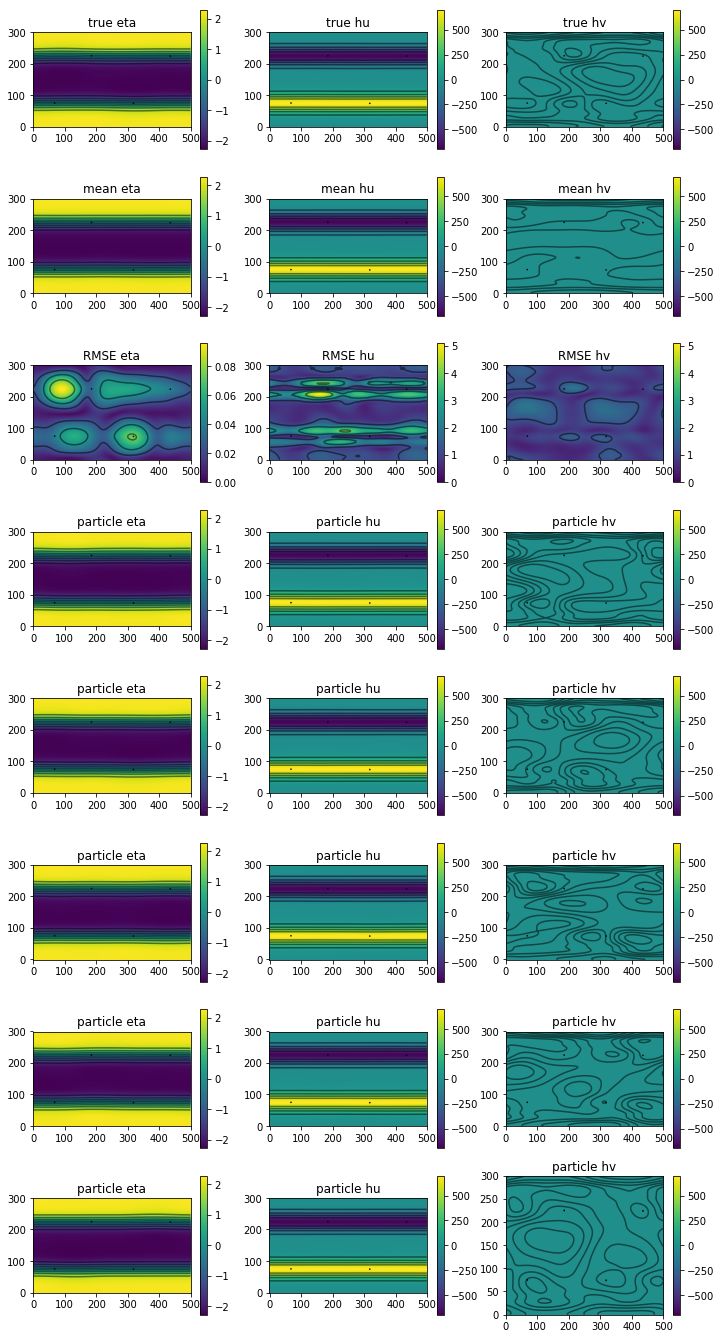

In [18]:
uniformpert_ensemble.plotEnsemble(num_particles=5, plotVelocityField=False)


In [19]:
uniformpert_ensemble.cleanUp()

## Steady initial conditions with model errors

Investigating in the divergence when all stochastic models starts from the same steady state initial conditions

Calling parent constructor from DoubleJetEnsemble
Hei from BaseOceanStateEnsemble
CPU times: user 3min 1s, sys: 30.8 s, total: 3min 32s
Wall time: 3min 32s


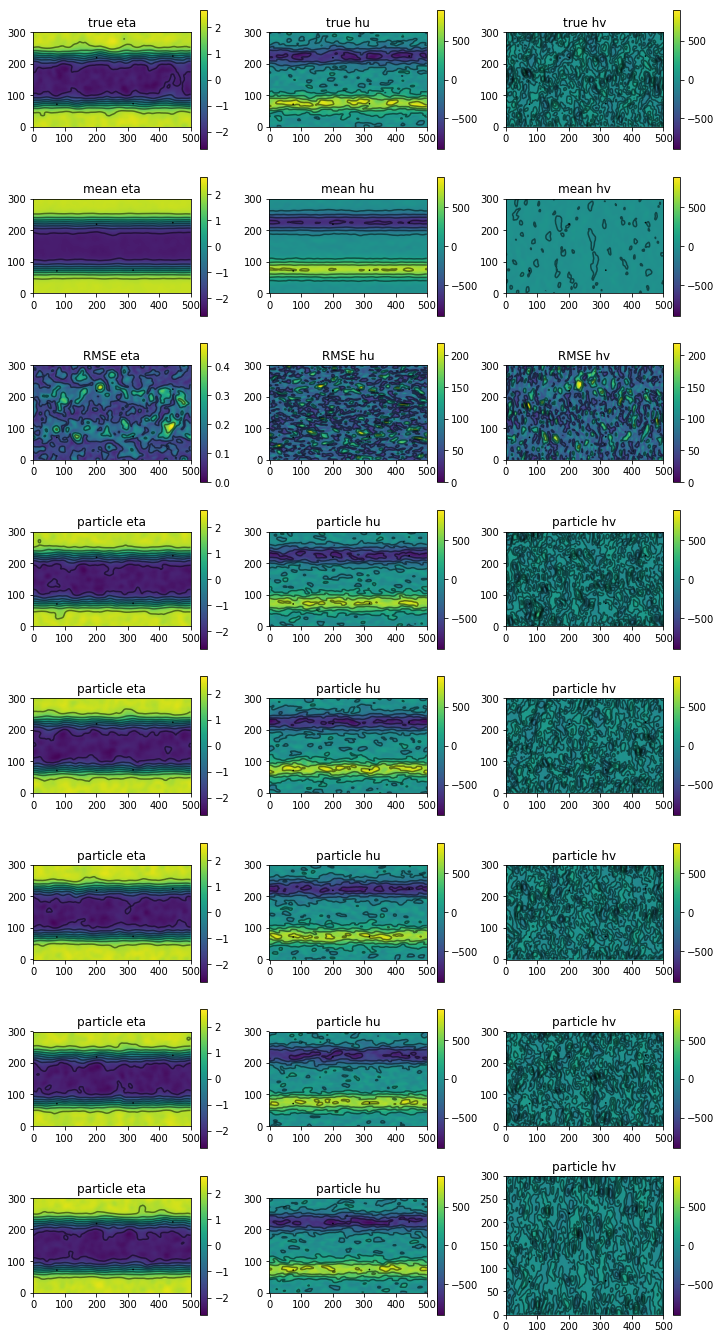

In [20]:
%%time
moderrDoubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, model_error=True)
moderr_ensemble = DoubleJetEnsemble.DoubleJetEnsemble(gpu_ctx, numParticles, 
                                                           moderrDoubleJetCase, num_drifters=4)
moderr_ensemble.step(num_steps*dt)
moderr_ensemble.plotEnsemble(num_particles=5, plotVelocityField=False)

## Stochastic initial conditions with model errors

Investigating in the divergence when all stochastic models starts from random $N(SS,10*Q)$, where SS is the steady-state initial conditions

Calling parent constructor from DoubleJetEnsemble
Hei from BaseOceanStateEnsemble


/home/havahol/miniconda3/envs/gpuocean/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/home/havahol/miniconda3/envs/gpuocean/lib/python3.6/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/havahol/miniconda3/envs/gpuocean/lib/python3.6/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/havahol/miniconda3/envs/gpuocean/lib/python3.6/site-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/home/havahol/miniconda3/envs/gpuocean/lib/python3.6/site-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/home/h

CPU times: user 5min 59s, sys: 1min 1s, total: 7min 1s
Wall time: 7min


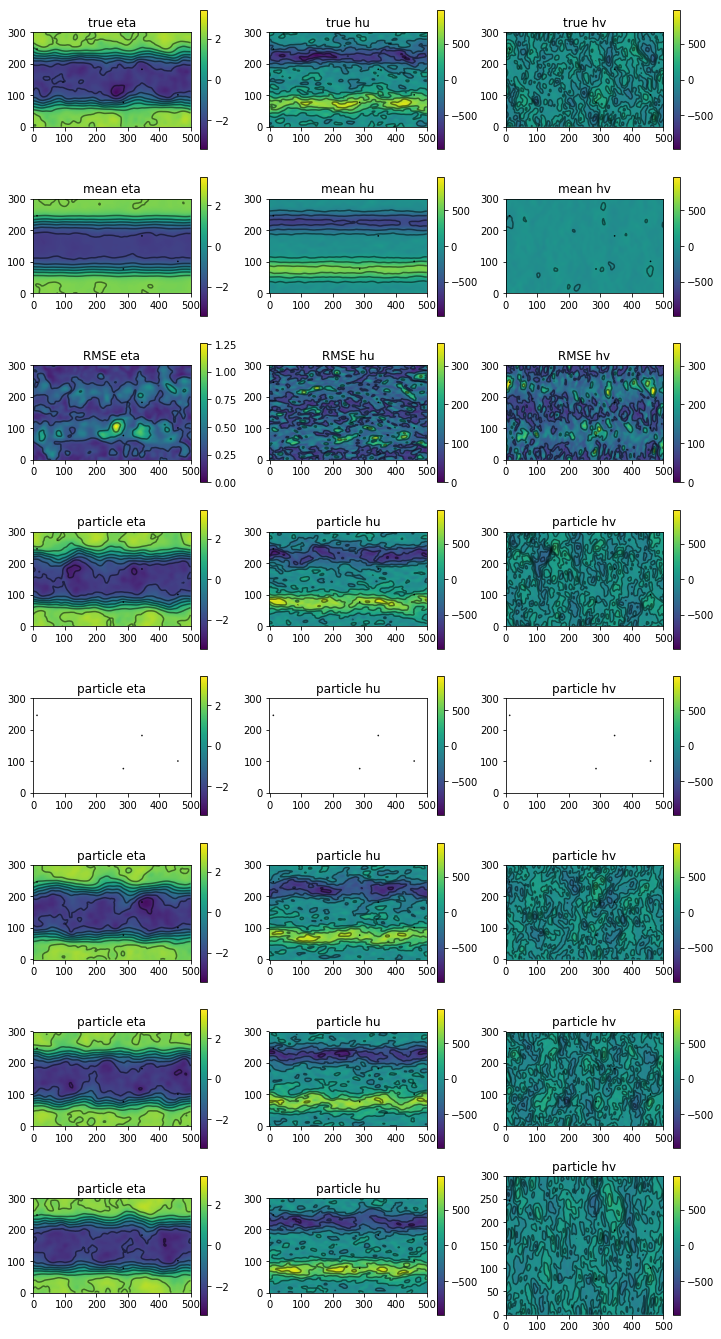

In [25]:
%%time
reload(DoubleJetEnsemble)
moderrInitDoubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, 
                                                      DoubleJetCase.DoubleJetPerturbationType.ModelErrorPerturbation, 
                                                      model_error=True)
moderrinit_ensemble = DoubleJetEnsemble.DoubleJetEnsemble(gpu_ctx, numParticles, 
                                                          moderrInitDoubleJetCase, 
                                                          num_drifters=4)
moderrinit_ensemble.step(num_steps*dt*2)
moderrinit_ensemble.plotEnsemble(num_particles=5, plotVelocityField=False)

### Testing the spin-up ensemble

# Spinup from steady-state

The first 2/3 of the spin up is common for all particles, while the last 1/3 has individual model error realizations.

First figure shows initial conditions, and second figure the development in the ensemble

**This case seems to be the most promising as a IEWPF use case.** For SIR particle filters, it would be more interesting to sample initial conditions from normal/uniform distributed initial conditions, possibly in combination with model errors.

tmp_sim has been spun up to 199999.9982379675
Calling parent constructor from DoubleJetEnsemble
Hei from BaseOceanStateEnsemble
Individual spin up for particle 0
Individual spin up for particle 1
Individual spin up for particle 2
Individual spin up for particle 3
Individual spin up for particle 4
Individual spin up for particle 5
Individual spin up for particle 6
Individual spin up for particle 7
Individual spin up for particle 8
Individual spin up for particle 9
Individual spin up for particle 10
Individual spin up for particle 11
Individual spin up for particle 12
Individual spin up for particle 13
Individual spin up for particle 14
Individual spin up for particle 15
Individual spin up for particle 16
Individual spin up for particle 17
Individual spin up for particle 18
Individual spin up for particle 19
Individual spin up for particle 20
CPU times: user 2min 15s, sys: 28.6 s, total: 2min 44s
Wall time: 2min 44s


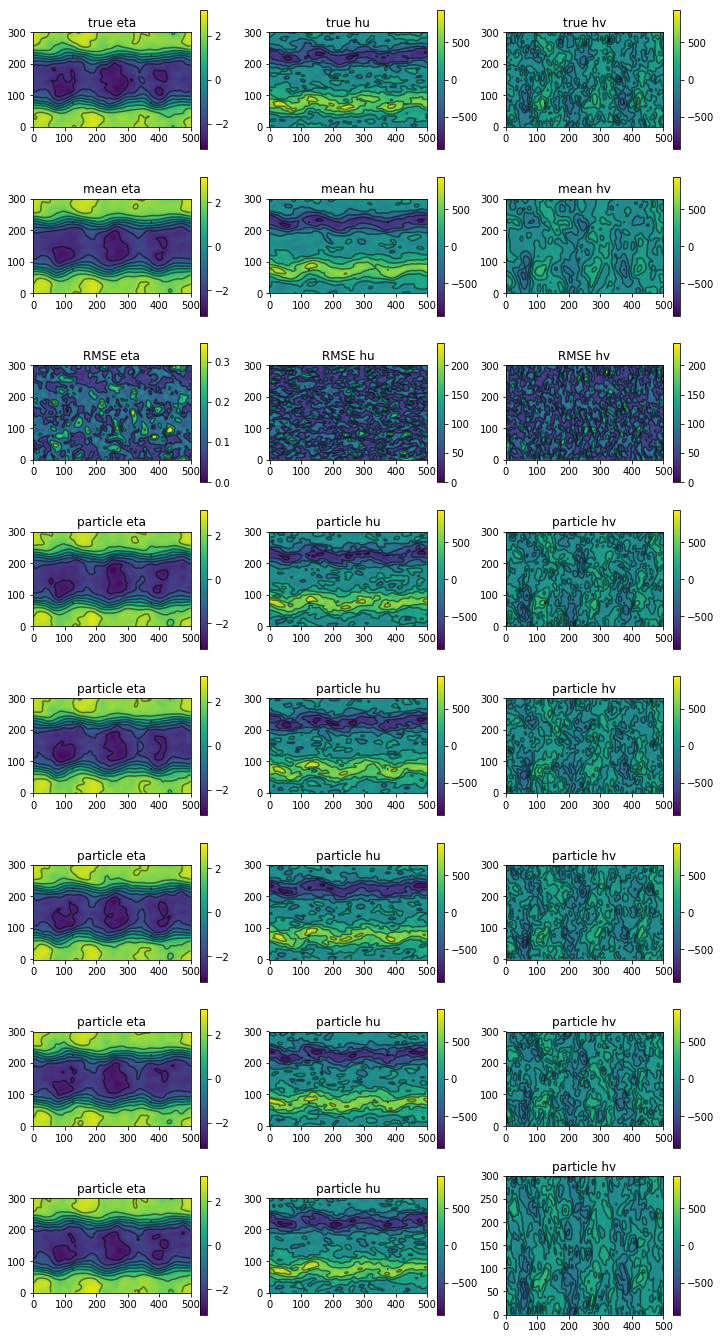

In [59]:
%%time
reload(DoubleJetCase)
reload(DoubleJetEnsemble)
spinUpDoubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, 
                                                  DoubleJetCase.DoubleJetPerturbationType.SpinUp, 
                                                  model_error=True)
spinup_ensemble = DoubleJetEnsemble.DoubleJetEnsemble(gpu_ctx, numParticles, 
                                                      spinUpDoubleJetCase, 
                                                      num_drifters=4)
#spinup_ensemble.step(num_steps*dt*2)
spinup_ensemble.plotEnsemble(num_particles=5, plotVelocityField=False)

CPU times: user 3min 53s, sys: 22.4 s, total: 4min 15s
Wall time: 4min 15s


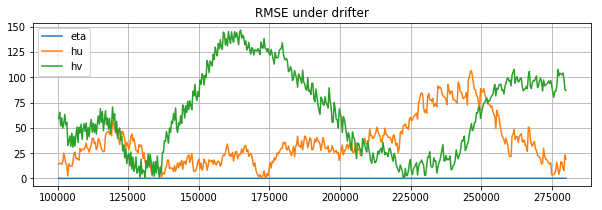

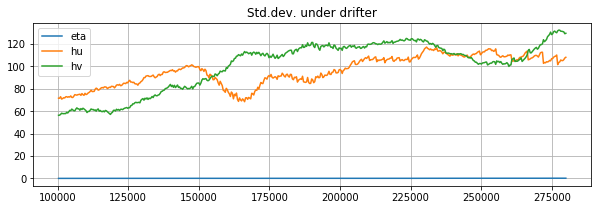

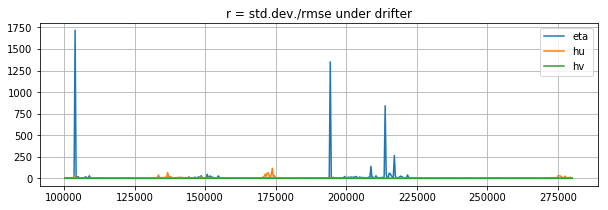

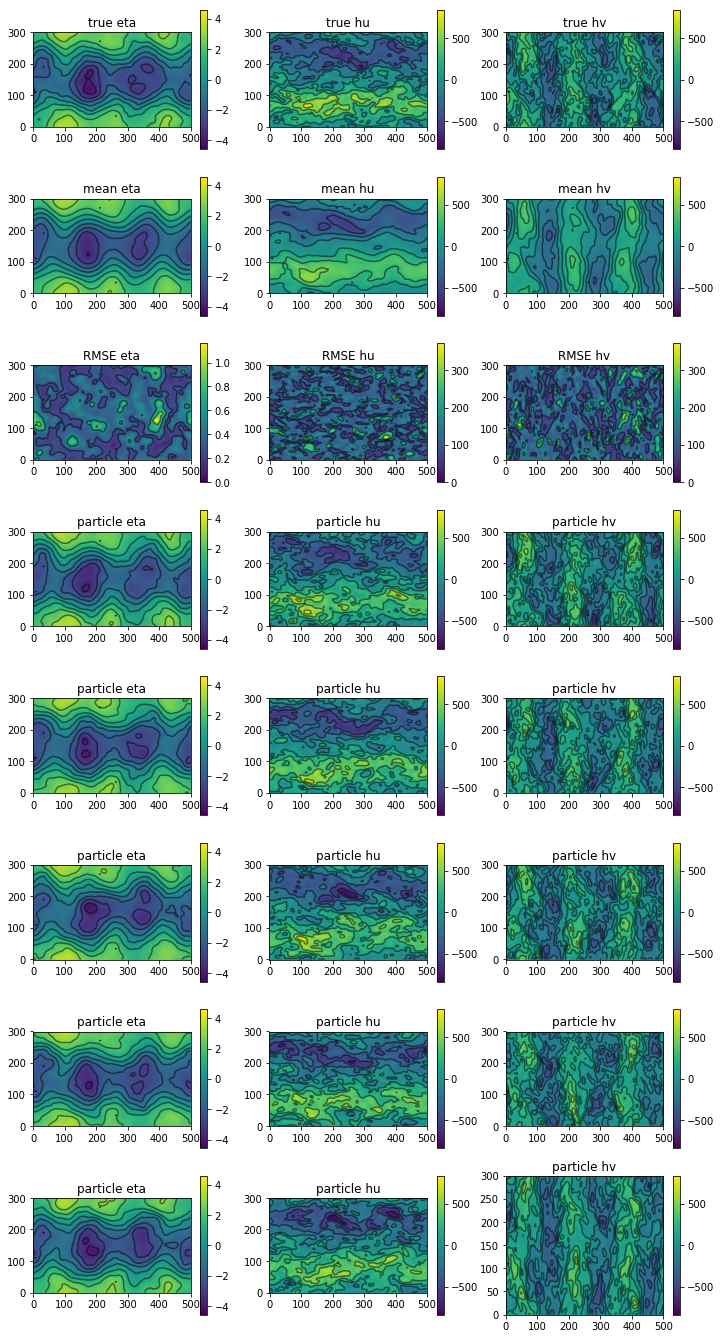

In [60]:
%%time
# Checking the development of RMSE under drifter 0:
for i in range(500):
    sub_dt = 60*6
    t = spinup_ensemble.step(sub_dt)
    spinup_ensemble.getEnsembleVarAndRMSEUnderDrifter(t)
    if i+3 % 100 == 0:
        print(i)
        
spinup_ensemble.plotRMSE()
spinup_ensemble.plotEnsemble(num_particles=5, plotVelocityField=False)

# Spinup from normal distributed perturbation bump

Each ensemble is given a slightly different perturbation bump, and has individual model errors through-out the spinup periode.


First figure shows initial conditions, and second figure the development in the ensemble

Calling parent constructor from DoubleJetEnsemble
Hei from BaseOceanStateEnsemble
Individual spin up for particle 0
Individual spin up for particle 1
Individual spin up for particle 2
Individual spin up for particle 3
Individual spin up for particle 4
Individual spin up for particle 5
Individual spin up for particle 6
Individual spin up for particle 7
Individual spin up for particle 8
Individual spin up for particle 9
Individual spin up for particle 10
Individual spin up for particle 11
Individual spin up for particle 12
Individual spin up for particle 13
Individual spin up for particle 14
Individual spin up for particle 15
Individual spin up for particle 16
Individual spin up for particle 17
Individual spin up for particle 18
Individual spin up for particle 19
Individual spin up for particle 20
CPU times: user 6min 34s, sys: 1min 18s, total: 7min 52s
Wall time: 7min 52s


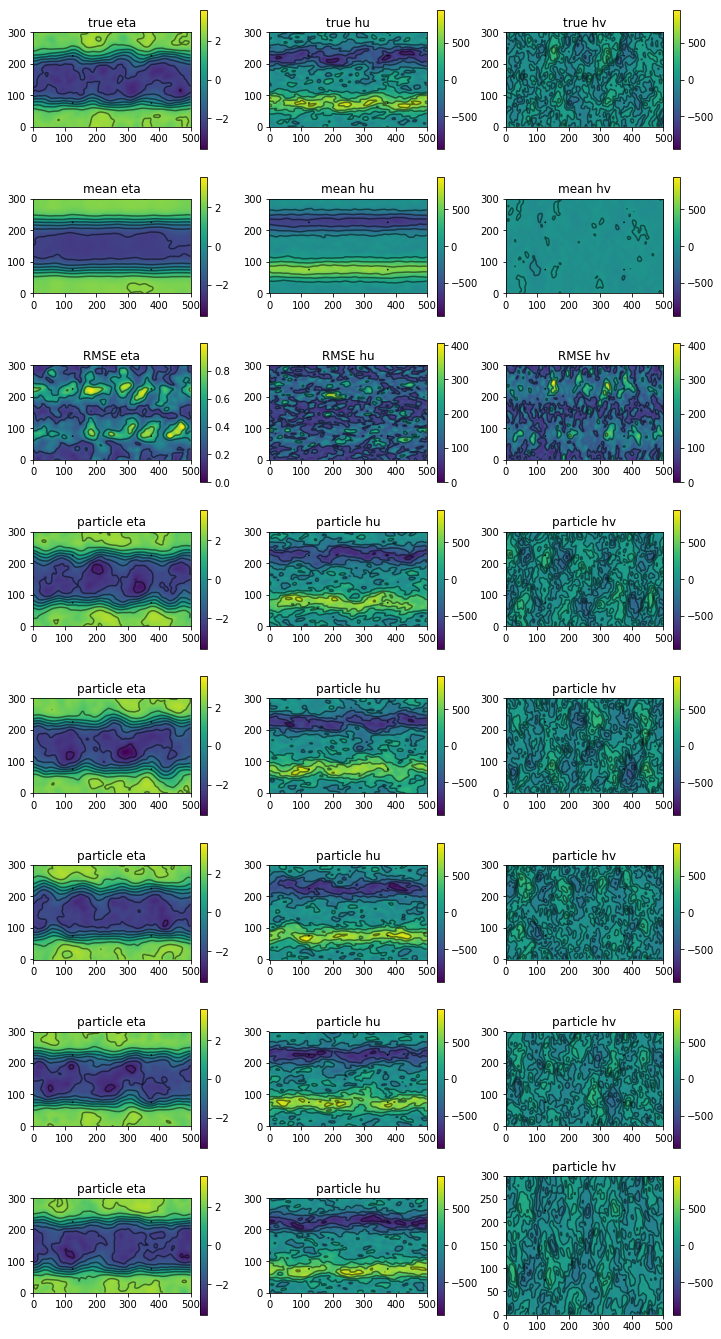

In [57]:
%%time
reload(DoubleJetCase)
reload(DoubleJetEnsemble)
normalSpinUpDoubleJetCase = DoubleJetCase.DoubleJetCase(gpu_ctx, 
                                                  DoubleJetCase.DoubleJetPerturbationType.NormalPerturbedSpinUp, 
                                                  model_error=True)
normalspinup_ensemble = DoubleJetEnsemble.DoubleJetEnsemble(gpu_ctx, numParticles, 
                                                            normalSpinUpDoubleJetCase, 
                                                            num_drifters=4)
#normalspinup_ensemble.step(num_steps*dt*2)
normalspinup_ensemble.plotEnsemble(num_particles=5, plotVelocityField=False)

/home/havahol/miniconda3/envs/gpuocean/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


CPU times: user 3min 55s, sys: 22.9 s, total: 4min 18s
Wall time: 4min 18s


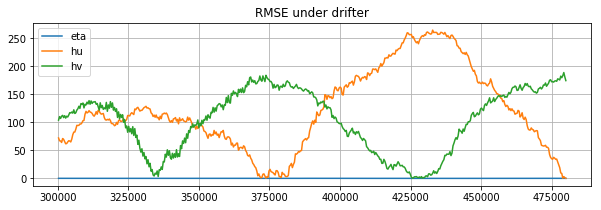

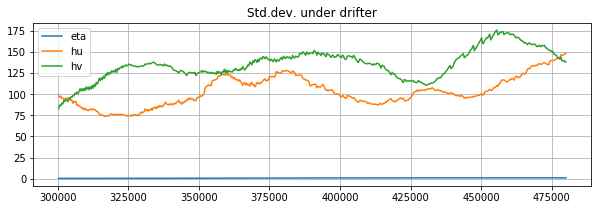

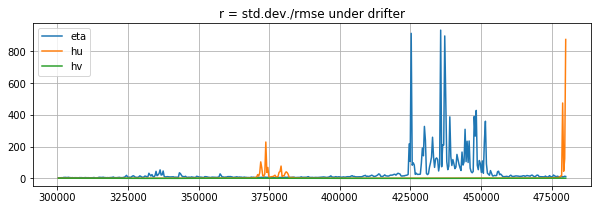

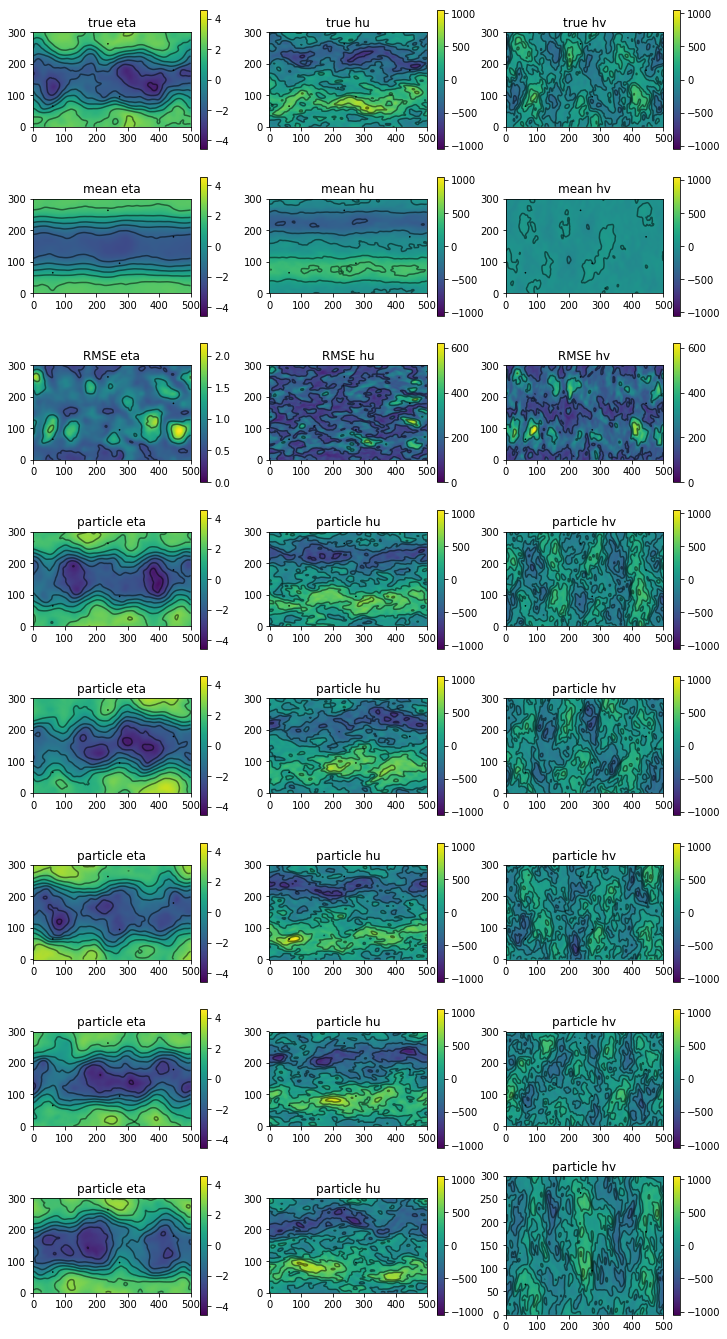

In [58]:
%%time
# Checking the development of RMSE under drifter 0:
for i in range(500):
    sub_dt = 60*6
    t = normalspinup_ensemble.step(sub_dt)
    normalspinup_ensemble.getEnsembleVarAndRMSEUnderDrifter(t)
    if i+3 % 100 == 0:
        print(i)
        
normalspinup_ensemble.plotRMSE()
normalspinup_ensemble.plotEnsemble(num_particles=5, plotVelocityField=False)